<a href="https://colab.research.google.com/github/killerkiemklan/Data-Mining-24-25/blob/main/cleaning_and_partitioning(more).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

plan:

split numericals from categoricals,

reduce feature amounts in preferences and shopping,

improve silhouette overall and find ideal model

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('data_clean.csv')

In [7]:
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,vendor_count,product_count,is_chain,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,Loyalty,Age_Group,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,RFM_Score,customer_region_0,customer_region_1,customer_region_2,customer_region_3
0,0,2.0,5.0,1.0,1,2,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,28.88,14.440,2.25,1.000000,90.0,2.0,0.0,1,0.092846,0,0,0,0,2,0,2.65,0.0,1.0,0.0,0.0
1,1,2.0,2.0,2.0,2,2,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,19.21,9.600,1.00,1.000000,90.0,2.0,0.0,0,0.090596,0,0,2,0,0,0,2.35,0.0,0.0,0.0,1.0
2,2,1.0,2.0,2.0,2,0,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,9.20,4.600,1.00,1.000000,90.0,2.0,0.5,3,0.088267,0,0,2,0,0,0,2.05,0.0,0.0,1.0,0.0
3,3,2.0,3.0,1.0,1,2,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.0,31.56,15.780,1.50,0.666667,89.0,3.0,0.0,2,0.066010,0,0,1,1,0,0,2.65,0.0,0.0,1.0,0.0
4,4,2.0,5.0,0.0,0,2,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.0,55.44,24.695,2.25,0.666667,89.0,3.0,0.0,1,0.071566,0,0,2,0,0,0,2.95,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,31883,1.0,1.0,1.0,3,2,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.0,18.04,18.040,1.00,1.000000,0.0,1.0,0.0,2,0.186393,0,0,0,1,0,0,3.40,0.0,0.0,0.0,1.0
31733,31884,1.0,1.0,0.0,1,2,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.0,18.04,18.040,1.00,1.000000,0.0,1.0,0.0,2,0.186393,0,0,0,0,1,0,3.40,0.0,0.0,0.0,1.0
31734,31885,1.0,1.0,1.0,0,2,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.0,17.79,17.790,1.00,1.000000,0.0,1.0,0.0,1,0.186393,0,1,0,0,0,0,3.40,0.0,0.0,0.0,1.0
31735,31886,1.0,1.0,0.0,2,2,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.0,12.03,12.030,1.00,1.000000,0.0,1.0,0.0,2,0.186393,0,0,1,0,0,0,3.10,0.0,0.0,0.0,1.0


In [30]:
df_copy = df.copy()
df_copy = df_copy.drop(columns=['Unnamed: 0'])
categorical_cols = ['last_promo', 'payment_method', 'customer_region_0', 'customer_region_1', 'customer_region_2', 'customer_region_3']
cat_df = df_copy[categorical_cols].copy()
numerical_cols = df_copy.columns.difference(categorical_cols)
num_df = df_copy[numerical_cols].copy()

In [31]:
num_df

,Age_Group,CLV_Score,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Items_Per_Order,Loyalty,Orders_Afternoon,Orders_Dawn,Orders_Dusk,Orders_Evening,Orders_Morning,Orders_Night,RFM_Score,Total_Orders_Per_Client,activity,frq,is_chain,mnt,mnt_Per_Order,product_count,rcn,vendor_count
0,1,0.092846,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.25,0.0,0,0,0,2,0,0,2.65,2.0,2.0,1.000000,1.0,28.88,14.440,5.0,90.0,2.0
1,0,0.090596,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,1.00,0.0,0,0,0,0,2,0,2.35,2.0,2.0,1.000000,2.0,19.21,9.600,2.0,90.0,2.0
2,3,0.088267,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,1.00,0.5,0,0,0,0,2,0,2.05,2.0,2.0,1.000000,2.0,9.20,4.600,2.0,90.0,1.0
3,2,0.066010,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,1.50,0.0,1,0,0,0,1,0,2.65,2.0,3.0,0.666667,1.0,31.56,15.780,3.0,89.0,2.0
4,1,0.071566,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.25,0.0,0,0,0,0,2,0,2.95,2.0,3.0,0.666667,0.0,55.44,24.695,5.0,89.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,2,0.186393,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.00,0.0,1,0,0,0,0,0,3.40,1.0,1.0,1.000000,1.0,18.04,18.040,1.0,0.0,1.0
31733,2,0.186393,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.00,0.0,0,0,0,1,0,0,3.40,1.0,1.0,1.000000,0.0,18.04,18.040,1.0,0.0,1.0
31734,1,0.186393,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.00,0.0,0,1,0,0,0,0,3.40,1.0,1.0,1.000000,1.0,17.79,17.790,1.0,0.0,1.0
31735,2,0.186393,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.00,0.0,0,0,0,0,1,0,3.10,1.0,1.0,1.000000,0.0,12.03,12.030,1.0,0.0,1.0


In [10]:
# Calculate the Spearman correlation matrix
spearman_corr = num_df.corr(method='spearman')

# Display the correlation matrix
spearman_corr



,Age_Group,CLV_Score,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Items_Per_Order,Loyalty,Orders_Afternoon,Orders_Dawn,Orders_Dusk,Orders_Evening,Orders_Morning,Orders_Night,RFM_Score,Total_Orders_Per_Client,activity,frq,is_chain,mnt,mnt_Per_Order,product_count,rcn,vendor_count
Age_Group,1.000000,0.008029,0.005723,0.003923,-0.005109,0.005333,-0.002110,0.002340,-0.005886,0.008266,-0.002564,0.003228,-0.006198,0.002167,0.001896,-0.000755,-0.000782,0.014155,0.002188,0.002543,0.008337,-0.002040,-0.002210,0.003904,0.003364,0.009922,0.006926,-0.002274,0.001361,0.001311,-0.001494,0.000482,0.012170,0.008039,0.006400,-0.003050,0.004309,0.007902,0.002042,0.008210,-0.012532,0.003960
CLV_Score,0.008029,1.000000,0.009025,0.074601,-0.011513,0.059109,-0.044897,0.007215,0.028317,0.028893,0.017270,0.003967,0.042438,-0.021215,0.015072,0.068899,0.017729,0.041674,0.052926,0.063361,0.094587,0.100607,0.016857,-0.004533,0.125428,-0.019965,0.008237,0.043632,-0.022636,-0.041549,0.050462,0.036009,0.713387,-0.106557,-0.183989,0.574515,-0.086399,0.119323,0.223013,-0.043445,-0.406842,-0.107176
CUI_American,0.005723,0.009025,1.000000,0.007332,-0.015387,0.065179,-0.000643,-0.010538,0.010316,0.003491,0.003923,0.057667,0.043318,-0.029172,0.026228,0.012435,0.029675,0.174074,0.175870,0.178959,0.189133,0.197675,0.187075,0.184536,0.031683,0.151400,0.169882,0.084221,0.086375,0.151380,0.187600,0.118107,0.162228,0.338085,0.296255,-0.105781,0.330598,0.280952,-0.013398,0.309508,-0.171845,0.351875
CUI_Asian,0.003923,0.074601,0.007332,1.000000,0.034078,-0.012756,-0.103489,-0.015550,0.075037,0.010005,-0.096040,-0.167585,0.040372,-0.082444,-0.131623,0.130413,-0.060153,0.162734,0.157037,0.156814,0.138672,0.104094,0.112397,0.118334,0.182380,0.045344,0.014751,0.344037,-0.053403,-0.149691,0.244490,0.328527,0.261421,0.252635,0.213526,-0.084808,0.094222,0.454214,0.339130,0.279956,-0.157729,0.297233
CUI_Beverages,-0.005109,-0.011513,-0.015387,0.034078,1.000000,-0.042555,0.094204,0.081135,0.098443,-0.008512,-0.034951,-0.143470,-0.000907,0.094591,0.009404,0.050634,-0.030654,0.127943,0.124477,0.115184,0.113511,0.099975,0.102991,0.093854,0.059450,0.000509,0.109414,0.208893,0.114618,-0.043844,0.145186,0.128476,0.074481,0.198629,0.171857,-0.058217,0.265690,0.135800,-0.060123,0.193098,-0.085882,0.250485
CUI_Cafe,0.005333,0.059109,0.065179,-0.012756,-0.042555,1.000000,-0.009093,-0.000914,-0.016337,0.105053,0.062099,0.121947,0.062444,-0.008576,0.131633,-0.049492,0.083459,0.114885,0.114361,0.116879,0.125629,0.117237,0.103285,0.118858,0.040379,0.111052,0.123698,0.030773,0.023953,0.144162,0.179790,-0.063906,0.125083,0.171584,0.135666,0.006320,0.165666,0.141881,-0.030471,0.167178,-0.103567,0.173375
CUI_Chicken_Dishes,-0.002110,-0.044897,-0.000643,-0.103489,0.094204,-0.009093,1.000000,0.157234,0.025076,-0.012814,0.081248,-0.035988,0.008776,0.210156,0.177586,-0.063354,0.046587,0.137344,0.133062,0.134775,0.132748,0.127351,0.125016,0.132129,0.012387,0.068544,0.179475,-0.107102,0.249155,0.233228,0.075279,-0.062044,0.009108,0.219054,0.183155,-0.036839,0.297081,-0.027078,-0.334315,0.200558,-0.091091,0.247379
CUI_Chinese,0.002340,0.007215,-0.010538,-0.015550,0.081135,-0.000914,0.157234,1.000000,0.026401,0.011930,-0.000944,-0.054318,0.050209,0.215469,0.126193,-0.021589,0.026105,0.137257,0.145548,0.141348,0.140331,0.126429,0.132369,0.148394,0.077362,0.079259,0.146449,-0.000133,0.168401,0.156189,0.115020,0.023641,0.089876,0.229416,0.185766,-0.024667,0.232578,0.095172,-0.167759,0.228505,-0.109997,0.251667
CUI_Desserts,-0.005886,0.028317,0.010316,0.075037,0.098443,-0.016337,0.025076,0.026401,1.000000,0.009390,-0.023756,-0.090356,0.012118,0.007400,-0.023845,0.085192,-0.029708,0.079590,0.077414,0.083423,0.075318,0.058157,0.069065,0.076604,0.045257,-0.010637,0.081983,0.170041,0.031799,-0.053549,0.109716,0.100097,0.08

In [11]:
# Calculate correlation matrix
corr_matrix = num_df.corr(method='spearman')

# Get correlations above 0.5 (excluding self-correlations)
strong_corrs = [(i, j, corr_matrix.loc[i, j])
                for i in corr_matrix.index
                for j in corr_matrix.columns
                if abs(corr_matrix.loc[i, j]) > 0.7 and i < j]

# Print sorted results
print("Correlations above 0.5:")
for var1, var2, corr in sorted(strong_corrs, key=lambda x: abs(x[2]), reverse=True):
    print(f"{var1} - {var2}: {corr:.3f}")

Correlations above 0.5:
Total_Orders_Per_Client - product_count: 0.947
Total_Orders_Per_Client - vendor_count: 0.886
product_count - vendor_count: 0.842
Total_Orders_Per_Client - activity: 0.832
mnt - product_count: 0.795
activity - product_count: 0.784
activity - vendor_count: 0.756
Total_Orders_Per_Client - is_chain: 0.727
activity - frq: -0.718
CLV_Score - RFM_Score: 0.713
is_chain - vendor_count: 0.705


In [12]:
num_df.columns

Index(['Age_Group', 'CLV_Score', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle_Dishes', 'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai',
       'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6',
       'Items_Per_Order', 'Loyalty', 'Orders_Afternoon', 'Orders_Dawn',
       'Orders_Dusk', 'Orders_Evening', 'Orders_Morning', 'Orders_Night',
       'RFM_Score', 'Total_Orders_Per_Client', 'activity', 'frq', 'is_chain',
       'mnt', 'mnt_Per_Order', 'product_count', 'rcn', 'vendor_count'],
      dtype='object')

In [32]:
value_engagement_metrics = [
    # Value
    'mnt', 'mnt_Per_Order', 'CLV_Score', 'RFM_Score',
    # Engagement
    'activity', 'Loyalty', 'frq', 'rcn' , 'Age_Group']

preference_metrics = [
    # Cuisine preferences
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
    'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
    'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle_Dishes',
    'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai'
]

shopping_behavior_metrics = [
    # Shopping patterns
    'vendor_count', 'product_count', 'is_chain', 'Items_Per_Order',
    # Timing preferences
    'Orders_Night', 'Orders_Dawn', 'Orders_Morning', 'Orders_Afternoon',
    'Orders_Evening', 'Orders_Dusk',
    'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6'
]

demographic_metrics = [
    'customer_region_0', 'customer_region_1', 'customer_region_2',
    'customer_region_3'
]

In [33]:
df_val = num_df[value_engagement_metrics].copy()
df_pref = num_df[preference_metrics].copy()
df_shop = num_df[shopping_behavior_metrics].copy()


time to reduce feature amount to label data better

In [15]:
print(f"Number of columns in df_pref: {df_pref.shape[1]}")
print(f"Number of columns in df_shop: {df_shop.shape[1]}")
print(f"Number of columns in df_val: {df_val.shape[1]}")

Number of columns in df_pref: 15
Number of columns in df_shop: 17
Number of columns in df_val: 9


In [16]:
cuisine_groups = {
    'Other_Asian': ['CUI_Chinese', 'CUI_Japanese', 'CUI_Noodle_Dishes','CUI_Thai', 'CUI_Indian'],
    'General_Asian' : ['CUI_Asian'],
    'Western': ['CUI_American', 'CUI_Italian'],
    'Beverages_Cafe': ['CUI_Beverages', 'CUI_Cafe'],
    'Desserts_Snacks': ['CUI_Desserts', 'CUI_Street_Food/Snacks'],
    'Main_Dishes': ['CUI_Chicken_Dishes', 'CUI_Healthy', 'CUI_OTHER']
}

# Calculate group totals and percentages
group_totals = {}
total_sum = 0

for group, cuisines in cuisine_groups.items():
    group_sum = num_df[cuisines].sum().sum()
    group_totals[group] = group_sum
    total_sum += group_sum

# Print results
print("Group Totals and Percentages:")
for group, total in group_totals.items():
    percentage = (total / total_sum) * 100
    print(f"{group:15s}: {total:8.0f} ({percentage:5.1f}%)")

print(f"\nTotal Sum:      {total_sum:8.0f}")

Group Totals and Percentages:
Other_Asian    :   242685 ( 19.9%)
General_Asian  :   317325 ( 26.0%)
Western        :   258568 ( 21.2%)
Beverages_Cafe :    98803 (  8.1%)
Desserts_Snacks:   152844 ( 12.5%)
Main_Dishes    :   150454 ( 12.3%)

Total Sum:       1220680


In [17]:
# Create copy
pref_clean = df_pref.copy()

# Initialize new columns for each group
group_columns = {
    'Other_Asian': ['CUI_Chinese', 'CUI_Japanese', 'CUI_Noodle_Dishes', 'CUI_Thai', 'CUI_Indian'],
    'General_Asian': ['CUI_Asian'],
    'Western': ['CUI_American', 'CUI_Italian'],
    'Beverages_Cafe': ['CUI_Beverages', 'CUI_Cafe'],
    'Desserts_Snacks': ['CUI_Desserts', 'CUI_Street_Food/Snacks'],
    'Main_Dishes': ['CUI_Chicken_Dishes', 'CUI_Healthy', 'CUI_OTHER']
}

# Create grouped columns
for group, cuisines in group_columns.items():
    pref_clean[group] = df_pref[cuisines].sum(axis=1)

# Keep only the new grouped columns
pref_clean = pref_clean[list(group_columns.keys())]

In [18]:
pref_clean

,Other_Asian,General_Asian,Western,Beverages_Cafe,Desserts_Snacks,Main_Dishes
0,28.88,0.00,0.00,0.00,0.00,0.0
1,0.00,6.39,12.82,0.00,0.00,0.0
2,0.00,0.00,9.20,0.00,0.00,0.0
3,17.86,13.70,0.00,0.00,0.00,0.0
4,0.00,40.87,14.57,0.00,0.00,0.0
...,...,...,...,...,...,...
31732,0.00,0.00,0.00,18.04,0.00,0.0
31733,0.00,0.00,18.04,0.00,0.00,0.0
31734,0.00,0.00,0.00,0.00,17.79,0.0
31735,0.00,12.03,0.00,0.00,0.00,0.0


PCA components for 95% variance: 4

k=3:
Silhouette: 0.578
Calinski-Harabasz: 8359.83
Davies-Bouldin: 1.25
SSE: 30321977.91
R2: 0.274
Inertia: 30321977.91

k=4:
Silhouette: 0.488
Calinski-Harabasz: 7569.43
Davies-Bouldin: 1.22
SSE: 26986232.59
R2: 0.322
Inertia: 26986232.59

k=5:
Silhouette: 0.558
Calinski-Harabasz: 8679.69
Davies-Bouldin: 0.87
SSE: 22108390.26
R2: 0.517
Inertia: 22108390.26

k=6:
Silhouette: 0.502
Calinski-Harabasz: 9099.00
Davies-Bouldin: 0.83
SSE: 19023034.45
R2: 0.559
Inertia: 19023034.45

k=7:
Silhouette: 0.422
Calinski-Harabasz: 8718.00
Davies-Bouldin: 0.89
SSE: 17480599.20
R2: 0.581
Inertia: 17480599.20

k=8:
Silhouette: 0.430
Calinski-Harabasz: 8753.25
Davies-Bouldin: 0.82
SSE: 15795211.31
R2: 0.649
Inertia: 15795211.31

k=9:
Silhouette: 0.332
Calinski-Harabasz: 8140.33
Davies-Bouldin: 0.91
SSE: 15166997.42
R2: 0.644
Inertia: 15166997.42

k=10:
Silhouette: 0.366
Calinski-Harabasz: 8429.51
Davies-Bouldin: 0.86
SSE: 13652315.53
R2: 0.682
Inertia: 13652315.53


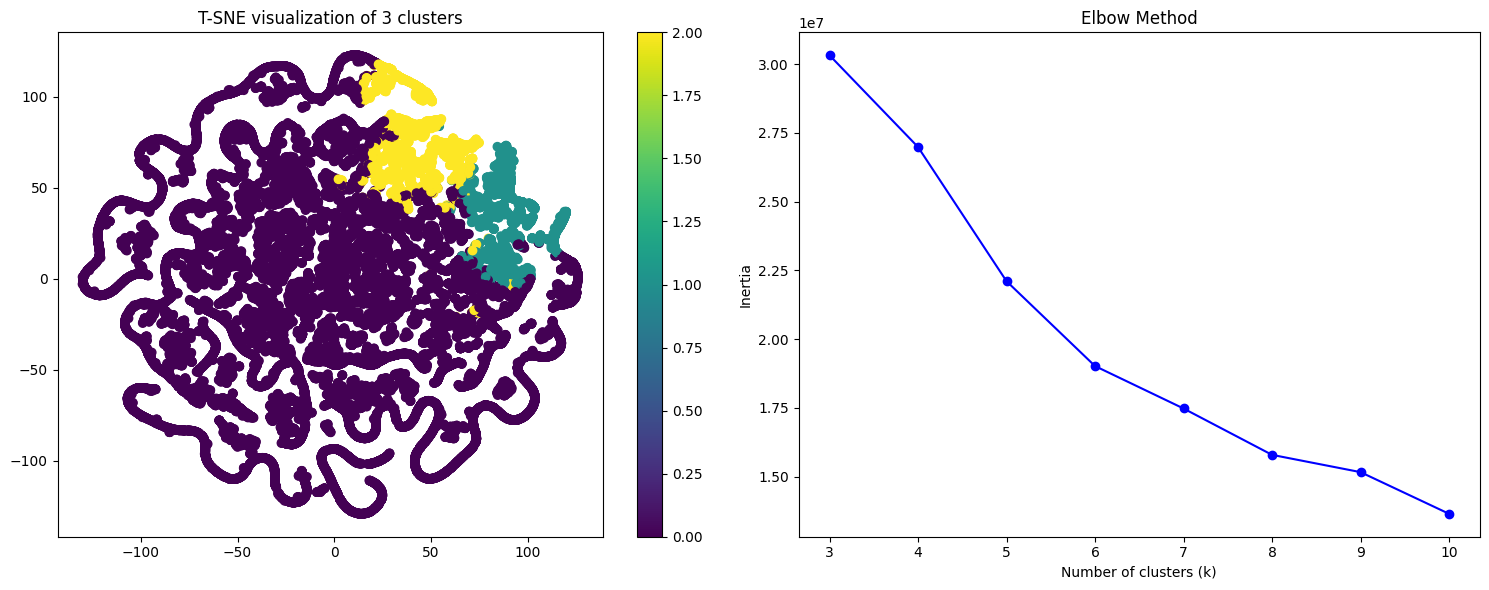

In [145]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, r2_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# PCA with 95% variance
pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(pref_clean)
print(f"PCA components for 95% variance: {X_pca.shape[1]}")

# Clustering metrics
metrics = []
for k in range(3, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_pca)

    # Calculate SSE
    sse = np.sum((X_pca - kmeans.cluster_centers_[labels]) ** 2)

    # Calculate R2
    r2 = r2_score(X_pca, kmeans.cluster_centers_[labels])

    metrics.append({
        'k': k,
        'silhouette': silhouette_score(X_pca, labels),
        'calinski': calinski_harabasz_score(X_pca, labels),
        'davies': davies_bouldin_score(X_pca, labels),
        'inertia': kmeans.inertia_,
        'sse': sse,
        'r2': r2
    })

# Print metrics
for m in metrics:
    print(f"\nk={m['k']}:")
    print(f"Silhouette: {m['silhouette']:.3f}")
    print(f"Calinski-Harabasz: {m['calinski']:.2f}")
    print(f"Davies-Bouldin: {m['davies']:.2f}")
    print(f"SSE: {m['sse']:.2f}")
    print(f"R2: {m['r2']:.3f}")
    print(f"Inertia: {m['inertia']:.2f}")

# T-SNE visualization
best_k = max(metrics, key=lambda x: x['silhouette'])['k']
kmeans_final = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
labels = kmeans_final.fit_predict(X_pca)

tsne = TSNE(random_state=42)
embedding = tsne.fit_transform(X_pca)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# T-SNE plot
scatter = ax1.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis')
ax1.set_title(f'T-SNE visualization of {best_k} clusters')
plt.colorbar(scatter, ax=ax1)

# Elbow plot
ax2.plot(range(3, 11), [m['inertia'] for m in metrics], 'bo-')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Inertia')
ax2.set_title('Elbow Method')

plt.tight_layout()
plt.show()

Based on the Silhouette Score, SSE (Elbow Method), and R², the ideal number of clusters for K-means appears to be 4. This provides a good balance between cluster separation, compactness, and simplicity. If you need more granular clusters, you could consider 5 clusters, but beyond that, the clustering quality may decline.

In [23]:
def encode_dow_cyclic(df):
    # Sum weighted DOWs
    dow_value = (df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']] *
                np.array([0, 1, 2, 3, 4, 5, 6])).sum(axis=1) / \
                df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)

    # Create cyclic encoding
    df['DOW_sin'] = np.sin(2 * np.pi * dow_value/7)
    df['DOW_cos'] = np.cos(2 * np.pi * dow_value/7)

    # Drop original DOW columns
    df.drop(['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6'], axis=1, inplace=True)

    return df

df['basket_segments'] = pd.cut(df['Items_Per_Order'],

    bins=[0, 2, 4, 6, np.inf],

    labels=['small', 'medium', 'large', 'bulk'])

df['product_segments'] = pd.cut(df['product_count'],

    bins=[0, 5, 15, 30, np.inf],

    labels=['minimal', 'standard', 'variety', 'high_variety'])

df['vendor_segments'] = pd.cut(df['vendor_count'],

    bins=[0, 1, 3, 5, np.inf],

    labels=['single', 'few', 'diverse', 'very_diverse'])

df_shop

In [226]:
df_shop.describe()

,vendor_count,product_count,is_chain,Items_Per_Order,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
count,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000
mean,2.918581,4.932445,2.252891,1.283130,0.285219,0.331348,1.078394,1.048020,1.336201,0.308851,0.558339,0.570029,0.593503,0.622081,0.680814,0.655796,0.707471
std,2.035818,3.931106,1.952278,0.350075,0.907566,0.946374,2.093201,1.834232,2.336247,0.989525,1.015171,1.045785,1.047444,1.071099,1.089727,1.071256,1.169202
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,2.000000,1.166667,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,7.000000,3.000000,1.500000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,8.000000,14.000000,6.000000,2.250000,20.000000,21.000000,58.000000,42.000000,49.000000,43.000000,16.000000,17.000000,15.000000,17.000000,16.000000,20.000000,20.000000


# MinMax scaling with custom ranges to score

"""Items_Per_Order (1-2.25):

Min 1: Single item is baseline order
Max 2.25: Very few customers order >2 items

product_count (1-14):

Min 1: Customers try at least one product
Max 14: Represents power users with wide product exploration
Aligns with 75th percentile around 7 products

vendor_count (1-8):

Min 1: Single vendor loyalty
Max 8: Reflects realistic maximum vendor relationships
Most customers use 1-3 vendors (75th percentile at 4)
"""

• Replaced log transform with MinMaxScaler for time periods to maintain relative differences on 0-1 scale

• Normalized DOW cyclic features to match 0-1 scale of other features

• Kept is_chain to preserve business context

• Added chain interactions with basket/vendor scores to
capture business patterns

• Unified all features to same scale range to prevent distance calculation skew



In [131]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Create copy and calculate scores
shop_clean = df_shop.copy()
shop_clean['basket_score'] = (shop_clean['Items_Per_Order'] - 1) / (2.25 - 1)
shop_clean['product_score'] = (shop_clean['product_count'] - 1) / (14 - 1)
shop_clean['vendor_score'] = (shop_clean['vendor_count'] - 1) / (8 - 1)

# Group into periods, no scaling
shop_clean['daytime_orders'] = shop_clean['Orders_Morning'] + shop_clean['Orders_Afternoon']
shop_clean['evening_orders'] = shop_clean['Orders_Evening'] + shop_clean['Orders_Dusk']
shop_clean['night_orders'] = shop_clean['Orders_Night'] + shop_clean['Orders_Dawn']

# DOW cyclic encoding
dow_value = (df_shop[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']] *
            np.array([0, 1, 2, 3, 4, 5, 6])).sum(axis=1) / \
            df_shop[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)

shop_clean['DOW_sin'] = np.sin(2 * np.pi * dow_value/7)
shop_clean['DOW_cos'] = np.cos(2 * np.pi * dow_value/7)
scaler_dow = MinMaxScaler()
shop_clean[['DOW_sin', 'DOW_cos']] = scaler_dow.fit_transform(shop_clean[['DOW_sin', 'DOW_cos']])

# Chain interactions
shop_clean['chain_basket_interaction'] = shop_clean['is_chain'] * shop_clean['basket_score']
shop_clean['chain_vendor_interaction'] = shop_clean['is_chain'] * shop_clean['vendor_score']

# Drop unneeded columns
columns_to_drop = ['vendor_count', 'product_count', 'Items_Per_Order'] + \
                 ['Orders_Night', 'Orders_Dawn', 'Orders_Morning', 'Orders_Afternoon', 'Orders_Evening', 'Orders_Dusk'] + \
                 ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']
shop_clean = shop_clean.drop(columns=columns_to_drop)

In [132]:
shop_clean.describe()

,is_chain,basket_score,product_score,vendor_score,daytime_orders,evening_orders,night_orders,DOW_sin,DOW_cos,chain_basket_interaction,chain_vendor_interaction
count,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000
mean,2.252891,0.226504,0.302496,0.274083,2.126414,1.645052,0.616567,0.541251,0.286337,0.489517,1.039175
std,1.952278,0.280060,0.302393,0.290831,3.164254,2.723351,1.480878,0.343075,0.291466,0.757171,1.653392
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.256506,0.049516,0.000000,0.000000
50%,2.000000,0.133333,0.153846,0.142857,1.000000,1.000000,0.000000,0.574521,0.188255,0.000000,0.285714
75%,3.000000,0.400000,0.461538,0.428571,3.000000,2.000000,1.000000,0.890916,0.388740,0.800000,1.142857
max,6.000000,1.000000,1.000000,1.000000,67.000000,59.000000,31.000000,1.000000,1.000000,6.000000,6.000000


In [133]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(shop_clean)
score = silhouette_score(shop_clean, labels)
print(f"Shape: {shop_clean.shape}")
print(f"Silhouette Score: {score:.3f}")

Shape: (31737, 11)
Silhouette Score: 0.502


In [140]:
!pip install umap.umap_

ERROR: Could not find a version that satisfies the requirement umap.umap_ (from versions: none)
ERROR: No matching distribution found for umap.umap_


PCA components for 95% variance: 3

k=3:
Silhouette: 0.538
Calinski-Harabasz: 19127.76
Davies-Bouldin: 1.04
SSE: 352002.81
R2: 0.351
Inertia: 352002.81

k=4:
Silhouette: 0.506
Calinski-Harabasz: 17330.82
Davies-Bouldin: 1.03
SSE: 294245.14
R2: 0.473
Inertia: 294245.14

k=5:
Silhouette: 0.478
Calinski-Harabasz: 15138.43
Davies-Bouldin: 1.09
SSE: 266942.53
R2: 0.514
Inertia: 266942.53

k=6:
Silhouette: 0.400
Calinski-Harabasz: 15490.33
Davies-Bouldin: 1.00
SSE: 225623.68
R2: 0.564
Inertia: 225623.68

k=7:
Silhouette: 0.360
Calinski-Harabasz: 14953.81
Davies-Bouldin: 1.02
SSE: 202823.32
R2: 0.594
Inertia: 202823.32

k=8:
Silhouette: 0.342
Calinski-Harabasz: 14456.96
Davies-Bouldin: 1.00
SSE: 185308.78
R2: 0.648
Inertia: 185308.78

k=9:
Silhouette: 0.328
Calinski-Harabasz: 14404.30
Davies-Bouldin: 0.99
SSE: 167606.97
R2: 0.676
Inertia: 167606.97

k=10:
Silhouette: 0.322
Calinski-Harabasz: 13848.81
Davies-Bouldin: 1.00
SSE: 157521.89
R2: 0.693
Inertia: 157521.89


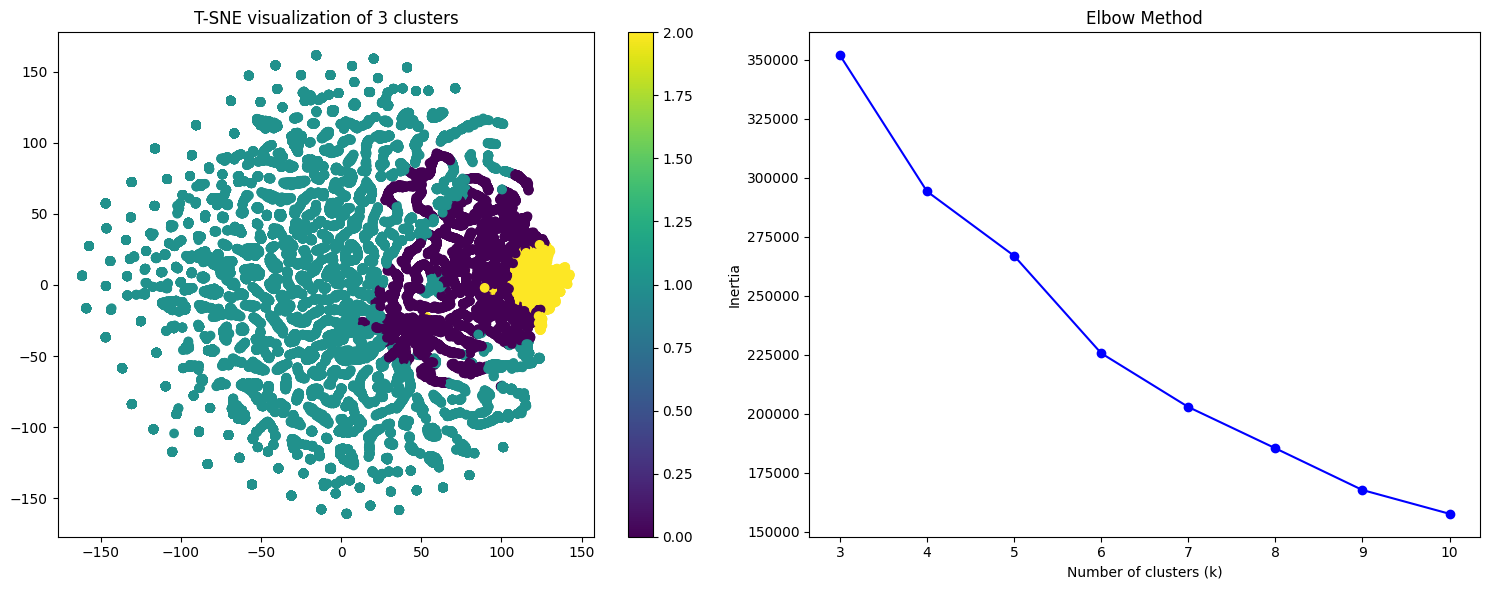

In [144]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, r2_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# PCA with 95% variance
pca = PCA(n_components=0.80)
X_pca = pca.fit_transform(shop_clean)
print(f"PCA components for 95% variance: {X_pca.shape[1]}")

# Clustering metrics
metrics = []
for k in range(3, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_pca)

    # Calculate SSE
    sse = np.sum((X_pca - kmeans.cluster_centers_[labels]) ** 2)

    # Calculate R2
    r2 = r2_score(X_pca, kmeans.cluster_centers_[labels])

    metrics.append({
        'k': k,
        'silhouette': silhouette_score(X_pca, labels),
        'calinski': calinski_harabasz_score(X_pca, labels),
        'davies': davies_bouldin_score(X_pca, labels),
        'inertia': kmeans.inertia_,
        'sse': sse,
        'r2': r2
    })

# Print metrics
for m in metrics:
    print(f"\nk={m['k']}:")
    print(f"Silhouette: {m['silhouette']:.3f}")
    print(f"Calinski-Harabasz: {m['calinski']:.2f}")
    print(f"Davies-Bouldin: {m['davies']:.2f}")
    print(f"SSE: {m['sse']:.2f}")
    print(f"R2: {m['r2']:.3f}")
    print(f"Inertia: {m['inertia']:.2f}")

# T-SNE visualization
best_k = max(metrics, key=lambda x: x['silhouette'])['k']
kmeans_final = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
labels = kmeans_final.fit_predict(X_pca)

tsne = TSNE(random_state=42)
embedding = tsne.fit_transform(X_pca)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# T-SNE plot
scatter = ax1.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis')
ax1.set_title(f'T-SNE visualization of {best_k} clusters')
plt.colorbar(scatter, ax=ax1)

# Elbow plot
ax2.plot(range(3, 11), [m['inertia'] for m in metrics], 'bo-')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Inertia')
ax2.set_title('Elbow Method')

plt.tight_layout()
plt.show()

In [146]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Encoder
input_dim = shop_clean.shape[1]
encoding_dim = 6  # Match PCA components

inputs = layers.Input(shape=(input_dim,))
encoded = layers.Dense(32, activation='relu')(inputs)
encoded = layers.Dense(16, activation='relu')(encoded)
bottleneck = layers.Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = layers.Dense(16, activation='relu')(bottleneck)
decoded = layers.Dense(32, activation='relu')(decoded)
outputs = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs, outputs)
encoder = Model(inputs, bottleneck)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(shop_clean, shop_clean, epochs=50, batch_size=32, validation_split=0.2)

# Get encoded features
encoded_features = encoder.predict(shop_clean)

# Clustering on encoded features
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels = kmeans.fit_predict(encoded_features)

Epoch 1/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.2504 - val_loss: 0.2975
Epoch 2/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9663 - val_loss: 0.2741
Epoch 3/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1134 - val_loss: 0.2636
Epoch 4/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2033 - val_loss: 0.2572
Epoch 5/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1583 - val_loss: 0.2545
Epoch 6/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0102 - val_loss: 0.2533
Epoch 7/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0932 - val_loss: 0.2525
Epoch 8/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1878 - val_loss: 0.2520
Epoch 9/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2041 - val_loss: 0.2517
Epoch 10/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0531 - val_loss: 0.2511
Epoch 11/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0500 - val_loss: 0.2511
Epoch 12/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Epoch 1/200
794/794 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.9760 - val_loss: 0.4824
Epoch 2/200
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7377 - val_loss: 0.4262
Epoch 3/200
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5715 - val_loss: 0.3409
Epoch 4/200
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4906 - val_loss: 0.3513
Epoch 5/200
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4327 - val_loss: 0.3270
Epoch 6/200
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4075 - val_loss: 0.2767
Epoch 7/200
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3651 - val_loss: 0.3600
Epoch 8/200
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3627 - val_loss: 0.3157
Epoch 9/200
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3568 - val_loss: 0.2437
Epoch 10/200
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3342 - val_loss: 0.2006
Epoch 11/200
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3298 - val_loss: 0.2591
Epoch 12/200
794/794 ━━━━━━━━━━━━━━━━━━━━

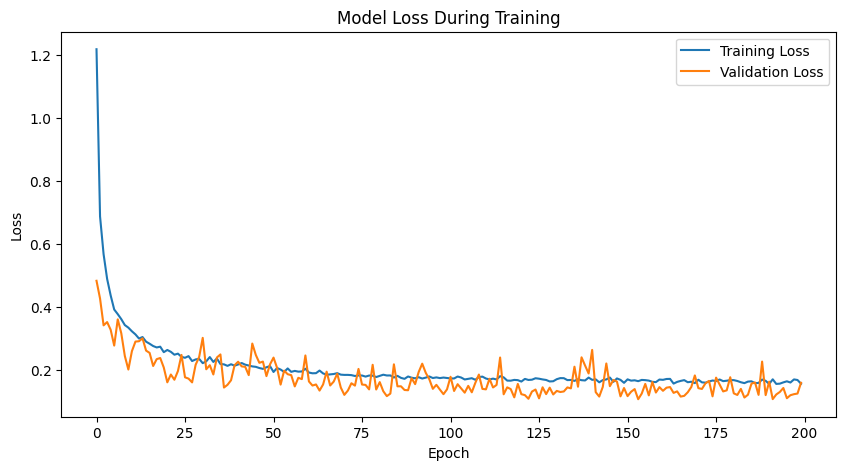

In [233]:
"""992/992 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Architecture: [128, 64, 32, 16], L1: 0.0001, Dim: 8
Silhouette: 0.600, R2: 0.415

Best configuration: ([64, 32, 16], 0.0001, 4)
Best silhouette: 0.718
Best R2: 0.511"""


import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.metrics import silhouette_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def build_autoencoder(input_dim, encoding_dim, l1_factor, architecture):
   inputs = layers.Input(shape=(input_dim,))
   x = inputs

   # Encoder
   for units in architecture:
       x = layers.Dense(units, activation='relu',
                       activity_regularizer=tf.keras.regularizers.L1(l1_factor))(x)
       x = layers.BatchNormalization()(x)

   bottleneck = layers.Dense(encoding_dim, activation='relu')(x)

   # Decoder
   for units in reversed(architecture):
       bottleneck = layers.Dense(units, activation='relu')(bottleneck)
       bottleneck = layers.BatchNormalization()(bottleneck)

   outputs = layers.Dense(input_dim)(bottleneck)

   model = Model(inputs, outputs)
   model.compile(optimizer='adam', loss='mse')
   return model, Model(inputs, bottleneck)

# Split data
X_train, X_test = train_test_split(shop_clean, test_size=0.2, random_state=42)

# Best configuration from previous experiments
autoencoder, encoder = build_autoencoder(
   input_dim=shop_clean.shape[1],
   encoding_dim=4,
   l1_factor=0.0001,
   architecture=[64, 32, 16]
)

# Train with monitoring
history = autoencoder.fit(X_train, X_train,
                        validation_data=(X_test, X_test),
                        epochs=200,
                        batch_size=32,
                        verbose=1)

# Evaluate clustering performance
train_encoded = encoder.predict(X_train)
test_encoded = encoder.predict(X_test)

kmeans = KMeans(n_clusters=3, random_state=42)
train_labels = kmeans.fit_predict(train_encoded)
test_labels = kmeans.predict(test_encoded)

# Print metrics
print(f"Train Silhouette: {silhouette_score(train_encoded, train_labels):.3f}")
print(f"Test Silhouette: {silhouette_score(test_encoded, test_labels):.3f}")
print(f"Final train loss: {history.history['loss'][-1]:.3f}")
print(f"Final val loss: {history.history['val_loss'][-1]:.3f}")

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

scoring low in R2 in both my engineering attempts,

Signs of Data Misfit:
If
𝑅
2
R
2
  is low and there is noticeable overlap in clusters (even with a high silhouette score), it could signal that clustering is oversimplifying the data structure.

  Increase the Number of Clusters: Check if
𝑘
>
3
k>3 improves
𝑅
2
R
2
  while maintaining a reasonable silhouette score.
Feature Engineering: Add, remove, or transform features to better capture variability in the dataset.
Domain Knowledge: Leverage domain expertise to interpret whether a low
𝑅

2
R
2
  is acceptable given the problem context.
Alternative Methods: Consider non-partitional clustering methods (e.g., DBSCAN, Agglomerative) if clusters seem too continuous or overlapping.

Higher
𝑅
2
R
2
 :

Increasing
𝑘
k naturally reduces the within-cluster variance (SSE/Inertia), thereby increasing the
𝑅
2
R
2
  score.
This happens because clusters become smaller and tighter, explaining more local variance.
Silhouette Score:

If the silhouette score remains reasonable or declines only slightly as
𝑘
k increases, the new clusters might still be meaningful.
However, a sharp drop in the silhouette score suggests that the additional clusters are artificial and may not reflect real structure in the data.
Calinski-Harabasz (CH) and Davies-Bouldin (DB) Indices:

These metrics help assess whether the new clusters are compact and well-separated.
Declining CH scores or worsening DB indices as
𝑘
k increases indicate that the clusters are becoming less meaningful despite a higher
𝑅
2
R
2
 .

In [169]:
df_val.describe()

,mnt,mnt_Per_Order,CLV_Score,RFM_Score,activity,Loyalty,frq,rcn,Age_Group,mnt_bin,mnt_Per_Order_bin,CLV_Score_bin,activity_bin,frq_bin,rcn_bin
count,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000
mean,0.353543,0.389488,0.311736,2.508433,0.393896,0.400573,0.239033,0.299345,1.771749,1.499732,1.498976,1.499953,1.486530,1.495699,1.471374
std,0.287330,0.255806,0.230668,0.606241,0.326766,0.490022,0.286394,0.254882,0.791278,1.118094,1.118432,1.118066,1.114032,1.121575,1.138702
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.135948,0.193217,0.110408,2.050000,0.033333,0.000000,0.040151,0.088889,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.256099,0.322713,0.253801,2.400000,0.377778,0.000000,0.082286,0.222222,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,0.481569,0.515930,0.466245,2.950000,0.688889,1.000000,0.424090,0.455556,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [230]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean[col] = df_clean[col].clip(lower=lower, upper=upper)
    return df_clean

def preprocess_df_val(df):
    cols_to_keep = ['mnt', 'mnt_Per_Order', 'activity', 'frq', 'rcn', 'CLV_Score', 'Loyalty', 'Age_Group']
    val_clean = df[cols_to_keep].copy()

    # RFM Score
    val_clean['RFM_Score'] = (val_clean['rcn'] * 0.4 +
                             val_clean['frq'] * 0.3 +
                             val_clean['mnt'] * 0.3)

    # Feature Interactions
    val_clean['RFM_CLV'] = val_clean['RFM_Score'] * val_clean['CLV_Score']
    val_clean['activity_freq_ratio'] = np.where(val_clean['frq'] != 0,
                                              val_clean['activity'] / val_clean['frq'], 0)
    val_clean['avg_order_value'] = np.where(val_clean['frq'] != 0,
                                          val_clean['mnt'] / val_clean['frq'], 0)

    # Remove outliers from numerical features
    numerical_features = ['activity_freq_ratio', 'avg_order_value', 'RFM_CLV']
    val_clean = remove_outliers(val_clean, numerical_features)

    # Final columns (removed squared and some ranking features due to correlation)
    final_cols = [
        'CLV_Score', 'RFM_Score', 'Loyalty', 'Age_Group',
        'RFM_CLV', 'activity_freq_ratio', 'avg_order_value'
    ]

    # Standardize numerical columns
    numerical_cols = [col for col in final_cols if col not in ['Age_Group', 'Loyalty', 'CLV_Score', 'RFM_Score']]
    scaler = StandardScaler()
    val_clean[numerical_cols] = scaler.fit_transform(val_clean[numerical_cols])

    return val_clean[final_cols]

In [231]:
# Usage:
val_clean = preprocess_df_val(df_val)

val_clean.describe()

,CLV_Score,RFM_Score,Loyalty,Age_Group,RFM_CLV,activity_freq_ratio,avg_order_value
count,31737.000000,31737.000000,31737.000000,31737.000000,3.173700e+04,3.173700e+04,3.173700e+04
mean,0.311736,0.297511,0.400573,1.771749,-4.298585e-17,-5.731447e-17,1.719434e-16
std,0.230668,0.146609,0.490022,0.791278,1.000016e+00,1.000016e+00,1.000016e+00
min,0.000000,0.016887,0.000000,0.000000,-1.030924e+00,-8.523716e-01,-9.484154e-01
25%,0.110408,0.181736,0.000000,1.000000,-8.103349e-01,-8.439110e-01,-8.632035e-01
50%,0.253801,0.281432,0.000000,2.000000,-4.765148e-01,-3.673003e-01,-3.119324e-01
75%,0.466245,0.381506,1.000000,2.000000,7.885799e-01,4.390018e-01,4.814199e-01
max,1.000000,0.937778,1.000000,5.000000,3.186952e+00,2.363371e+00,2.498355e+00


In [232]:
# Clustering on encoded features
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels = kmeans.fit_predict(val_clean)

# Calculate metrics
silhouette = silhouette_score(val_clean, labels)
ch_score = calinski_harabasz_score(val_clean, labels)
db_score = davies_bouldin_score(val_clean, labels)

print(f"Silhouette: {silhouette:.3f}")
print(f"Calinski-Harabasz: {ch_score:.2f}")
print(f"Davies-Bouldin: {db_score:.2f}")

Silhouette: 0.351
Calinski-Harabasz: 20286.43
Davies-Bouldin: 1.09


I think the vaue segment is very limited, i need to maybe redo some information in this to make cluster definition easier, and perhaps decrease variance too.